# **Sommaire**



### 1.  A propos des données 
### 2.  Objectif 
### 3. Chargement des librairies 
### 4. Chargement des données 
### 5. Statistiques descriptives en amont du modèle 
### 6. Séparation des données en caractéristiques et cible 
### 7. Séparation des données en jeu de données d'apprentissage et de test 
### 8. Entrainement du modèle (les cinqs étapes du cycle de vie d'un modèle

  **A. Définition du modèle**

  **B. Compilation du modèle**

  **C. Ajustement du modèle aux données**

  **D. Evaluation du modèle **
  
  **.réglage des hyperparamètres**

  **E. Prédiction du modèle**









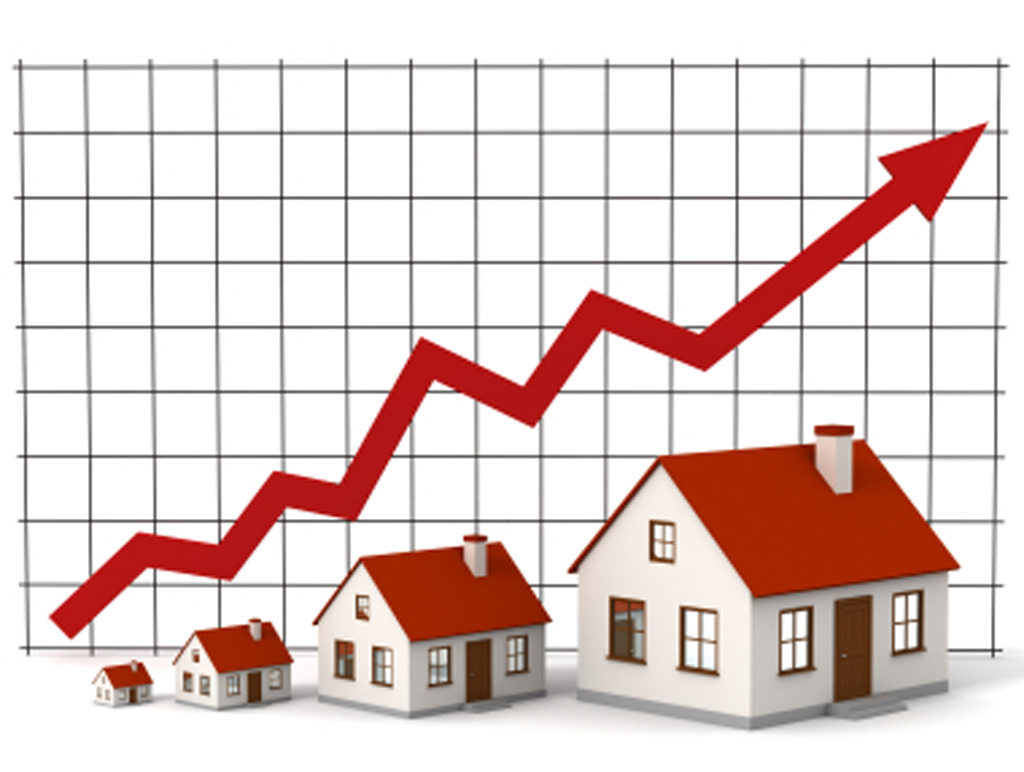

In [1]:
from IPython.display import Image 


display(Image("housing_price.jpg" , width = 500 , unconfined = True))

# 1.  A propos des données 

Nous travaillerons sur un ensemble de données provenant du secteur immobilier de Boston (États-Unis). Cette base de données contient 14 attributs. La variable cible fait référence à la valeur médiane des logements occupés par leur propriétaire en 1000 USD.

CRIM: taux de criminalité par habitant par ville

ZN: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.

INDUS: proportion d'acres commerciaux non commerciaux par ville

CHAS: Variable fictive de Charles River (= 1 si la zone limite la rivière; 0 sinon)

NOX: concentration d'oxydes nitriques (parties par 10 millions)

RM: nombre moyen de pièces par logement

AGE: proportion de logements occupés par leur propriétaire construits avant 1940

DIS: distances pondérées jusqu'à cinq centres d'emploi de Boston

RAD: indice d'accessibilité aux autoroutes radiales

TAXE: taux de la taxe foncière sur la valeur totale pour 10000 USD

PTRATIO: ratio élèves-enseignant par ville

B: 1000 (Bk - 0,63) ^ 2 où Bk est la proportion de Noirs par ville

LSTAT: statut inférieur de la population (%)

MEDV: valeur médiane des logements occupés par leur propriétaire en 1000 USD (cible)

# 2. Objectif 

Notre objectif est d'utiliser la régression linéaire pour trouver la valeur médiane des logements occupés par leur propriétaire en 1000 USD.

Nous allons donc construire  un modèle d'apprentissage automatique (c'est-à-dire la régression linéaire) en utilisant l'API tensorflow.keras (en abrégé tf.keras).

# 3. Chargement des librairies 

Il s'agit des différents packages qui vont nous servir dans notre travail de modélisation 

1. Numpy : pour les calculs optimisés en python (matriciel , numériques , etc)

2. Pandas : pour la manipulation des dataframes 

3. Scipy.stats : pour les tests statistiques (normalité par exemple)

4. Matplotlib : pour la visualisation des données 

---



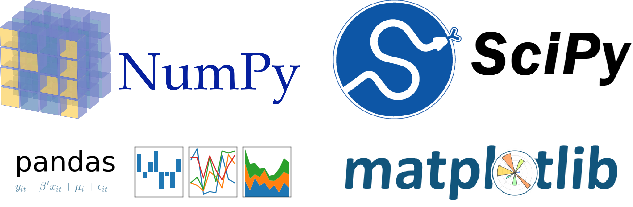

In [2]:
from IPython.display import Image 

display(Image("logo.png"))

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt 

# 4. Chargement des données 

Pour charger les données on utilise pandas .

C'est  l'élément par exellence de manipulation de dataframe dans python .

On écrit pour cela une petite fonction qui prend  entrée le chemin du fichier 

csv à lire  et retourne un dataframe pandas 


In [4]:
def load_dataset(csv):

  df = pd.read_csv(csv)
  return df 

boston_housing_df = load_dataset("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")

# 5. Statistiques descriptives  en amont du modèle 

Dans cette partie , nous allons décrire chaque variable du jeu de données :

Notons par ailleurs que notre jeu de données contient essentiellement des variables quantitatives . 

Voici donc les étapes à réaliser pour décrire une variable quantitative  :

1. Moyenne

2. écart-type

3. médiane

4. minimum 

5. maximum 

6. Histogramme pour avoir un aperçu de la distribution, et éventuellement comparer à une gaussienne 

7. Test de normalité à ajouter 

8. Boîte à moustaches pour estimer la présence ou non d'outliers



On écrit  une fonction permettant la description statistique d'une variable  et ensuite on va l'utiliser pour chacune des colonnes du jeu de données.

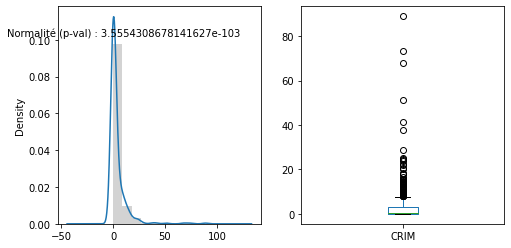

In [5]:
def descQuanti(var):
    # description d'une variable quantitative du jeu de données boston_housing_df
    # récupération des valeurs de la variable 
    valeur = boston_housing_df[var]
    # affichage des différentes informations demandées sous forme de dataframe pandas 
    pd.DataFrame([round(np.mean(valeur)) , 
               round(np.std(valeur)) ,  
               round(np.median(valeur)),
               round(np.min(valeur)),
               round(np.max(valeur))
               ] , index = ['moyenne' , 'ecart_type' , 'mediane' , 'minimum' , 'maximum'],columns = ['Stats_descriptives'])
    # création d'un graphique avec 2 zones
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    # création de l'histogramme avec la densité
    h = valeur.plot(kind = "hist", density = True, color = "lightgrey", ax = ax1)
    valeur.plot(kind = "kde", ax = ax1)
    # on y ajoute la p-value du test de normalité
    t = sc.normaltest(valeur)
    plt.text(.9, .9, "Normalité (p-val) : " + str(t.pvalue),
                           horizontalalignment='right',
                           verticalalignment='top',
                           transform = h.transAxes)
    # création de la boîte à moustache
    boston_housing_df.boxplot(column = var, grid = False, ax = ax2)

# on applique notre fonction sur la variable  CRIM
descQuanti("CRIM")
# Ensuite on peut changer  et voir la description des  autres variables
# descQuanti("TAX")

# 6. Séparation des données en caractéristiques  et cibles 

In [6]:
# features = boston_housing_df.iloc[:,0:13] une autre manière de récupérer toutes lea variables sauf celles que nous voulons prédire .
features = boston_housing_df.drop(labels = "MEDV" , axis = 1 )
target = boston_housing_df['MEDV']

In [7]:
from IPython.display import display
display((features.head(2) , target.head(2)))

(       CRIM   ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
 0  15.02340  0.0  18.10   0.0  0.614  ...  24.0  666.0     20.2  349.48  24.91
 1   0.62739  0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  395.62   8.47
 
 [2 rows x 13 columns], 0    12.0
 1    19.9
 Name: MEDV, dtype: float64)

#7. Séparation des données en jeu d'apprentissage et tests 

Nous voulons vérifier les performances du modèle que nous avons construit.

 À cette fin, nous divisons toujours (à la fois les données d'entrée et de sortie) les données données en ensemble d'apprentissage qui sera utilisé pour entraîner le modèle, et ensemble de test qui sera utilisé pour vérifier avec quelle précision le modèle prévoit les résultats.


In [8]:
from sklearn.model_selection import train_test_split

train_features , test_features , train_labels , test_labels = train_test_split(features , target , test_size = 20  ,  random_state = 42)




In [10]:
# Trouvons le nombre de variable qui nous sera utile dans la définition de notre modèle 

n_features = features.shape[1]

print(n_features)

13


# 8. Entrainement du modèle 

Après avoir divisé les données en jeu d'apprentissage et   de test, il est temps de former notre premier modèle d'apprentissage en profondeur.  Avant d'entraîner le modèle d'apprentissage profond, comprenons le cycle de vie du modèle d'apprentissage profond.

Ici, nous vous donnons juste un aperçu de l'architecture d'un réseau de neurone.

Un réseau de neurone se compose :

d'une couche d'entrée et de sortie avec une ou plusieurs couches cachées.


# Le cycle de vie du modèle en 5 étapes

Un modèle a un cycle de vie, et cette connaissance très simple fournit l'épine dorsale à la fois pour la modélisation d'un ensemble de données et la compréhension de l'API tf.keras.

Les cinq étapes du cycle de vie sont les suivantes:

**A. Définition du modèle.**

**B. Compilation  du  modèle.**

**C. Montage  du modèle ou ajustement du modèle aux données .**

**D. Prédictions sur les données de test.**


**E. Évaluation le modèle.**

Nous examinerons de plus près chacune des étapes et créerons en parallèle le modèle d'apprentissage en profondeur.

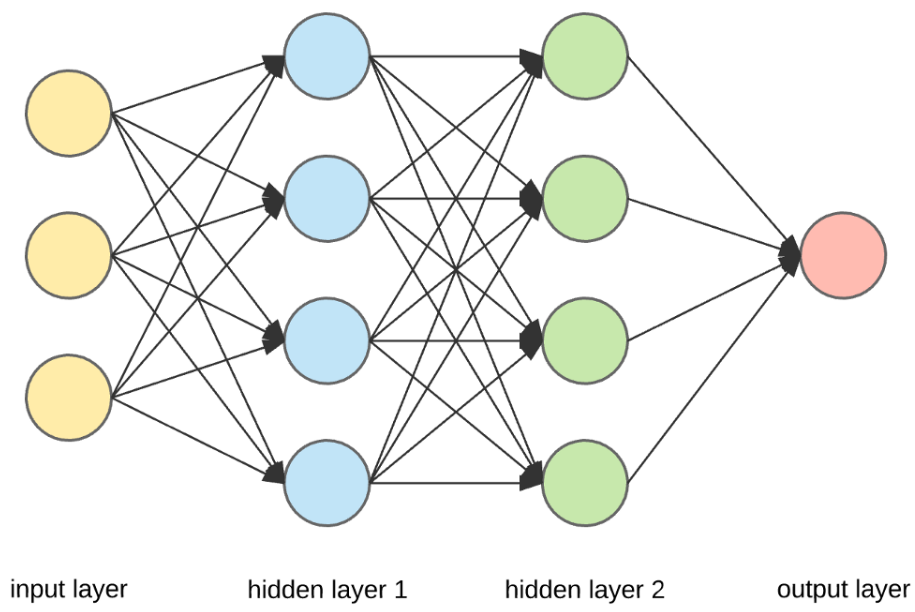

In [11]:
from IPython.display import Image

display(Image('nn+arch.png'))

# A. Définition du modèle 

Pour définir le modèle, nous  d'abord sélectionner le type de modèle dont vous avez besoin, puis choisir l'architecture ou la topologie du réseau.

Du point de vue de l'API, cela implique de définir les couches du modèle, de configurer chaque couche avec un certain nombre de noeuds et une fonction d'activation, et de connecter les couches ensemble dans un modèle .

Les modèles peuvent être définis avec l'API séquentielle ou l'API fonctionnelle.

 Ici, nous allons définir le modèle avec l'API séquentielle. 
 
 Maintenant, qu'est-ce que l'API séquentielle?

API séquentielle L'API séquentielle est l'API la plus simple pour démarrer avec le Deep Learning.

On l'appelle «séquentielle» car elle implique la définition d'une classe séquentielle et l'ajout de couches au modèle une par une de manière linéaire, de l'entrée à la sortie.

L'exemple ci-dessous définit un modèle MLP séquentiel qui accepte une entrée  a une couche cachée avec 1 noeud, puis une couche de sortie avec un noeud pour prédire une valeur numérique.

In [12]:
import tensorflow as tf 



In [13]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units =10 , input_shape = (n_features ,) , activation = 'relu'),
                     tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                     tf.keras.layers.Dense(units = 1 )
])

Notez que la couche visible du réseau est définie par l'argument «input_shape» sur la première couche masquée. Cela signifie que dans l'exemple ci-dessus, le modèle s'attend à ce que l'entrée d'un échantillon soit un vecteur de n_features (c'est-à-dire 13) nombre.

L'API séquentielle est facile à utiliser car vous continuez d'appeler model.add () jusqu'à ce que vous ayez ajouté toutes vos couches.

La fonction d'activation que nous avons choisie est ReLU, qui signifie unité linéaire rectifiée. La fonction d'activation décide si un neurone doit être activé ou non

ReLU est défini mathématiquement par F (x) = max (0, x). En d'autres termes, la sortie est x, si x est supérieur à 0, et la sortie est 0 si x est 0 ou négatif.

# B. Compilation du modèle 


La compilation du modèle nécessite que nous sélectionnions d'abord une fonction de perte que nous souhaitons optimiser, telle que l'erreur quadratique moyenne ou l'entropie croisée

Cela nécessite également que nous sélectionnions un algorithme pour exécuter la procédure d'optimisation. 
Nous utilisons RMSprop comme optimiseur ici. RMSprop signifie Root Mean Square Propagation. 

C'est l'un des algorithmes d'optimisation de descente de gradient les plus populaires pour les réseaux d'apprentissage en profondeur. RMSprop est un optimiseur fiable et rapide.

In [14]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01) # learning_rate 


Il est important de trouver une bonne valeur pour le taux d'apprentissage de notre modèle sur le jeu de données d'entraînement. 

Nous ne pouvons pas calculer analytiquement le taux d'apprentissage optimal pour un modèle donné sur un ensemble de données donné. 

Au lieu de cela, un taux d'apprentissage bon (ou assez bon) doit être découvert par essais et erreurs.

La plage de valeurs à considérer pour le taux d'apprentissage est inférieure à 1,0 et supérieure à 10−6.

Une valeur par défaut traditionnelle pour le taux d'apprentissage est 0,1 ou 0,01, ce qui peut représenter un bon point de départ pour notre problème

In [16]:
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

Pour ajuster le modèle, nous devons d'abord sélectionner la configuration d'apprentissage, 

telle que le nombre d'époques (boucles dans l'ensemble de données d'apprentissage) 

et la taille du lot (nombre d'échantillons dans une époque utilisé pour estimer l'erreur du modèle).





La formation applique l'algorithme d'optimisation choisi pour minimiser la fonction de perte choisie et met à jour le modèle en utilisant la 

rétropropagation ou backpropoagation 

L'ajustement du modèle est la partie lente de l'ensemble du processus et peut prendre de quelques secondes à quelques heures, voire plusieurs jours, en fonction de la complexité du modèle, du matériel que vous utilisez et de la taille de l'ensemble de données d'entraînement.

In [17]:
seed_value = 42
#seed(seed_value)        # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value) 
model.fit(train_features, train_labels, epochs=10, batch_size=30, verbose = 1)

Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 524.6729
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 146.9914
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 99.8013
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 99.9315
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 105.8294
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 92.5028
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 87.5805
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 86.8958
Epoch 9/10
13/13 [==============================] - 0s 1ms/step - loss: 83.2752
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 71.9370


En définissant verbose 0, 1 ou 2, on dit simplement comment nous voulons 

«voir» la progression de l'entraînement pour chaque époque.

verbose = 0 ne vous montrera rien (silencieux)

verbose = 1 vous montrera une barre de progression animée comme ceci:

progres_bar

verbose = 2 mentionnera simplement le nombre d'époque comme ceci:

verbeux = 2

# C. Evaluation du modèle 

Pour évaluer le modèle, vous devez d'abord choisir un jeu de données d'exclusion utilisé pour évaluer le modèle. Il doit s'agir de données non utilisées dans le processus de formation, c'est-à-dire le test_features

La vitesse d'évaluation du modèle est proportionnelle à la quantité de données que nous souhaitons utiliser pour l'évaluation, bien qu'elle soit beaucoup plus rapide que l'apprentissage car le modèle n'est pas modifié.

Du point de vue de l'API, cela implique d'appeler une fonction avec l'ensemble de données d'exclusion et d'obtenir une perte et peut-être d'autres mesures pouvant être signalées.

In [18]:
model.evaluate(test_features , test_labels )

1/1 [==============================] - 0s 1ms/step - loss: 86.9553


86.95530700683594

L'erreur quadratique moyenne que nous avons obtenue ici est de 47.4 environ  Maintenant, qu'est-ce que cela signifie?

Lorsque nous soustrayons les valeurs prédites (des données test_features) de la valeur réelle (des données test_features), puis mettez-les au carré et additionnez tous les carrés, et finalement en prenant une moyenne 

evaluer () effectue cette tâche automatiquement. Si vous voulez obtenir la prediciton pour test_features , vous pouvez faire model.predict (test_features)

Réglage des hyperparamètres
Les hyperparamètres ici dans ce cahier sont:

Taux d'apprentissage ou learning rate
Époques : epochs 
Taille du lot : batch size 
Nous pouvons essayer de changer les valeurs de ces paramètres et voir les performances du modèle (évaluer le modèle) sur les données X_test

Taux d'apprentissage ou learning rate 

Un scalaire utilisé pour entraîner un modèle via une descente de gradient. Lors de chaque itération, l'algorithme de descente de gradient multiplie le taux d'apprentissage par le gradient. Le produit résultant est appelé l'étape de gradient.

Le taux d'apprentissage est un hyperparamètre clé.

In [19]:
seed_value = 42
random.seed(seed_value)

np.random.seed(seed_value)
tf.random.set_seed(seed_value)




model = tf.keras.Sequential([tf.keras.layers.Dense(units =10 , input_shape = (n_features , ) , activation = 'relu'), 
                             tf.keras.layers.Dense(units =8 , activation = 'relu') , 
                             tf.keras.layers.Dense(units = 1)
                             ])
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.1))



model.fit(train_features , train_labels , epochs = 10 , batch_size = 30 , verbose = 1)




print('MSE value : ' , model.evaluate(test_features , test_labels))



Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 42438.7930
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 115.3782
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 86.8289
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 91.1272
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 226.3211
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 217.5430
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 193.5368
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 442.2089
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 273.9715
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 61.3693
MSE value :  61.36932373046875


Testons les différentes valeurs du learning rate et vérifions l'impact sur les performances du model 

In [20]:
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)

tf.random.set_seed(seed_value)

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , activation = 'relu' , input_shape = (n_features ,)),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(loss = "mean_squared_error",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.02))


model.fit(train_features , train_labels , epochs = 10 , batch_size = 30 , verbose = 1)



print('MSE value : ' , model.evaluate(test_features , test_labels))




Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 2104.5291
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 203.5298
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 162.1364
Epoch 4/10
13/13 [==============================] - 0s 1ms/step - loss: 174.9019
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 101.2090
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 108.7109
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 82.4084
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 95.5073
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 84.0330
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 45.2585
MSE value :  45.258522033691406


In [21]:
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)

tf.random.set_seed(seed_value)

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , activation = 'relu' , input_shape = (n_features ,)),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(loss = "mean_squared_error",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.04))


model.fit(train_features , train_labels , epochs = 10 , batch_size = 30 , verbose = 1)



print('MSE value : ' , model.evaluate(test_features , test_labels))




Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 2586.0564
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 99.1071
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 186.7595
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 113.6480
Epoch 5/10
13/13 [==============================] - 0s 1ms/step - loss: 103.8351
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 236.5318
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 90.2702
Epoch 8/10
13/13 [==============================] - 0s 1ms/step - loss: 87.9779
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 105.5684
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 29.8317
MSE value :  29.8316650390625



Un entraînement complet passe sur l'ensemble de données de sorte que chaque exemple ait été vu une fois. 


Ainsi, une époque représente N itérations d'apprentissage par taille de lot, où N est le nombre total d'exemples.

In [22]:
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)

tf.random.set_seed(seed_value)

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , activation = 'relu' , input_shape = (n_features ,)),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(loss = "mean_squared_error",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.04))


model.fit(train_features , train_labels , epochs = 100 , batch_size = 10 , verbose = 1)



print('MSE value : ' , model.evaluate(test_features , test_labels))



Epoch 1/100
39/39 [==============================] - 0s 1ms/step - loss: 1054.6882
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 99.2825
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 109.9365
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 120.2726
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 111.8032
Epoch 6/100
39/39 [==============================] - 0s 962us/step - loss: 88.0845
Epoch 7/100
39/39 [==============================] - 0s 913us/step - loss: 88.3503
Epoch 8/100
39/39 [==============================] - 0s 954us/step - loss: 89.5355
Epoch 9/100
39/39 [==============================] - 0s 1ms/step - loss: 89.6820
Epoch 10/100
39/39 [==============================] - 0s 961us/step - loss: 77.2098
Epoch 11/100
39/39 [==============================] - 0s 960us/step - loss: 73.0312
Epoch 12/100
39/39 [==============================] - 0s 910us/step - loss: 84.4611
Epoch 13

In [23]:
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)

tf.random.set_seed(seed_value)

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , activation = 'relu' , input_shape = (n_features ,)),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(loss = "mean_squared_error",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.04))


model.fit(train_features , train_labels , epochs = 200 , batch_size = 15 , verbose = 1)



print('MSE value : ' , model.evaluate(test_features , test_labels))


Epoch 1/200
26/26 [==============================] - 0s 1ms/step - loss: 1561.9183
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 139.1399
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 88.4710
Epoch 4/200
26/26 [==============================] - 0s 1ms/step - loss: 126.4772
Epoch 5/200
26/26 [==============================] - 0s 1ms/step - loss: 113.2943
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 140.5692
Epoch 7/200
26/26 [==============================] - 0s 942us/step - loss: 93.9231
Epoch 8/200
26/26 [==============================] - 0s 976us/step - loss: 93.6521
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 120.1157
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 85.0595
Epoch 11/200
26/26 [==============================] - 0s 1ms/step - loss: 105.9182
Epoch 12/200
26/26 [==============================] - 0s 1ms/step - loss: 94.5083
Epoch 13/200


Résumé du réglage des hyperparamètres
La plupart des problèmes d'apprentissage automatique nécessitent de nombreux réglages d'hyperparamètres. 


Malheureusement, nous ne pouvons pas fournir de règles de réglages concrètes pour chaque modèle. 


La réduction du taux d'apprentissage ou learning rate peut aider un modèle à converger efficacement, mais faire converger un autre modèle beaucoup trop lentement. 


Nous devons expérimenter pour trouver le meilleur ensemble d'hyperparamètres pour notre ensemble de données. 

Cela dit, voici quelques règles de base:

La perte d'entraînement devrait diminuer régulièrement, d'abord fortement, puis plus lentement jusqu'à ce que la pente de la courbe atteigne ou s'approche de zéro.

Si la perte de formation(train_loss)  ne converge pas, il faut s'entrainer sur  plus d'époques.


Si la perte d'entraînement diminue trop lentement, augmentez le taux d'apprentissage. Notez que le réglage du taux d'apprentissage trop élevé peut également empêcher la perte d'entraînement de converger.
Si la perte d'entraînement varie énormément (c'est-à-dire que la perte d'entraînement augmente), diminuez le taux d'apprentissage.
Réduire le taux d'apprentissage tout en augmentant le nombre d'époques ou la taille du lot est souvent une bonne combinaison.

La définition de la taille du lot sur un très petit numéro de lot peut également provoquer une instabilité. Tout d'abord, essayons de grandes valeurs de taille de lot. 

Ensuite, diminuons la taille du lot jusqu'à ce que nous ayons une dégradation.


Pour les ensembles de données du monde réel composés d'un très grand nombre d'exemples, l'ensemble de données peut ne pas tenir dans la mémoire. 

Dans de tels cas, vous devrez réduire la taille du lot pour permettre à un lot de tenir en mémoire.


N'oublions pas: la combinaison idéale d'hyperparamètres dépend des données, nous devons donc toujours expérimenter et vérifier.

Nous pouvons effectuer une procédure de réglage des hyperparamètres de deux manières:

Implémentation du réglage des hyperparamètres avec Sklearn
Implémentation du réglage d'hyperparamètres avec Keras

**Implémentation du réglage des hyperparamètres avec Sklearn**


Eh bien, nous pouvons automatiser le réglage des hyperparamètres à l'aide de GridSearCV. 



GridSearchCV est une procédure de recherche d'hyperparamètres effectuée sur une grille définie d'hyperparamètres. 

Chacune des combinaisons d'hyperparamètres est utilisée pour former un nouveau modèle, 

tandis qu'un processus de validation croisée est exécuté pour mesurer les performances des modèles provisoires. 

Une fois le processus terminé, les hyperparamètres et le modèle avec les meilleures performances sont choisis.

Jetons  d'abord un œil à l'implémentation de GridSearchCV avec Sklearn, en suivant les étapes:

1. Définir l'architecture générale du modèle
2. Définir la grille des hyperparamètres à valider
3. Exécutez le processus GridSearchCV
4. Imprimez les résultats du meilleur modèle

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV  

seed_value = 42 


random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)


model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , input_shape = (n_features , ) ,activation = 'relu'),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])

model.compile(loss = "mean_squared_error" , optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.04))

# ab 

batch_size = [10, 20, 40, 60, 80, 100]

epochs = [10 , 60 , 100 , 200 ]



param_grid = dict(batch_size = batch_size , epochs = epochs)


grid = GridSearchCV(estimator = model , param_grid = param_grid , scoring = 'neg_mean_squared_error' , n_jobs = -1 )



grid_result = grid.fit(train_features , train_labels)


print("Best: %f using %s"  %(grid_result.best_score_ , grid_result.best_params_))

TypeError: ignored


Nous pouvons observer une erreur dans la procédure de réglage des hyperparamètres à l'aide de Sklearn natif, 


car le modèle défini est un modèle séquentiel implémenté par Keras, et non un estimateur scikit-learn. 


Afin de corriger cette erreur, nous allons intégrer correctement Sklearn et Keras, en :

 (a) créant une fonction create_model qui permet de créer le modèle de manière automatisée
 
  et 
 
 (b) définissant un modèle KerasRegressor qui est une implémentation du scikit- learn l'API du régresseur pour Keras.

In [26]:

# Import KerasRegressor class
from keras.wrappers.scikit_learn import KerasRegressor


def create_model(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.04)):
  model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , input_shape = (n_features , ) ,activation = 'relu'),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])
  model.compile(loss = "mse" , optimizer = optimizer , metrics = ['mse'])


  return model 


batch_size = [10, 20, 40, 60, 80, 100]

epochs = [10 , 60 , 100 , 200 ]



param_grid = dict(batch_size = batch_size , epochs = epochs)



model = KerasRegressor(create_model , verbose = 1)

grid = GridSearchCV(estimator = model , param_grid = param_grid , scoring = 'neg_mean_squared_error' , n_jobs = -1 )



grid_result = grid.fit(train_features , train_labels)


print("Best: %f using %s"  %(grid_result.best_score_ , grid_result.best_params_))


Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 2334.8914 - mse: 2334.8914
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 92.4673 - mse: 92.4673
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 72.5146 - mse: 72.5146
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 74.3628 - mse: 74.3628
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 150.2683 - mse: 150.2683
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 149.0809 - mse: 149.0809
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 72.0548 - mse: 72.0548
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 224.2995 - mse: 224.2995
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 69.4358 - mse: 69.4358
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 105.0820 - mse: 105.0820
Epoch 11/200
5/5 [=============================

In [27]:
# Import the cross validation evaluator
from sklearn.model_selection import cross_val_score

# Measure the model's performance
results = cross_val_score(grid.best_estimator_, test_features, test_labels, cv=5)
print('Results: \n  * Mean:', -results.mean(), '\n  * Std:', results.std())

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 1207.4839 - mse: 1207.4839
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 41474.0391 - mse: 41474.0391
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 588.1869 - mse: 588.1869
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 393.3450 - mse: 393.3450
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 208.7668 - mse: 208.7668
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 295.0763 - mse: 295.0763
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 317.6836 - mse: 317.6836
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 138.6059 - mse: 138.6059
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 70.6587 - mse: 70.6587
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 70.7780 - mse: 70.7780
Epoch 11/200
1/1 [===================

**mise en œuvre du réglage des hyperparamètres avec Keras**


Nous allons maintenant passer par le processus d'automatisation du réglage des hyperparamètres à l'aide de la recherche aléatoire et de Keras. 

La recherche aléatoire est une procédure de recherche d'hyperparamètres qui est effectuée sur une grille définie d'hyperparamètres. 

Cependant, toutes les combinaisons d'hyperparamètres ne sont pas utilisées pour former un nouveau modèle, seules certaines sont sélectionnées au hasard, 


tandis qu'un processus de validation croisée permet de mesurer les performances des modèles temporels. 



Une fois le processus terminé, les hyperparamètres et le modèle le plus performant sont choisis.

Jetons un coup d'œil à l'implémentation de la recherche aléatoire avec Keras, en suivant les étapes:

A . Installez et importez tous les packages nécessaires

B.  Définir l'architecture générale du modèle via une fonction de création

C. Définir la grille des hyperparamètres à valider

D. Exécutez le processus GridSearchCV

E. Imprimez les résultats du meilleur modèle

Pour exécuter la procédure de réglage des hyperparamètres, 

nous utiliserons le keras-tuner , une bibliothèque qui vous aide à choisir l'ensemble optimal d'hyperparamètres pour votre modèle TensorFlow.

In [29]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 61kB 2.1MB/s 


In [33]:

# 1. Define the general architecture of the model through a creation user-defined function
def model_builder(hp):
  model = tf.keras.Sequential([tf.keras.layers.Dense(units = 10 , input_shape = (n_features , ) ,activation = 'relu'),
                             tf.keras.layers.Dense(units = 8 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 1)
                             ])
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 4e-4]) # Tuning the learning rate (four different values to test: 0.1, 0.01, 0.001, 0.0004)
  optimizer = tf.keras.optimizers.RMSprop(learning_rate = hp_learning_rate)                            # Defining the optimizer
  model.compile(loss='mse',metrics=['mse'], optimizer=optimizer)                   # Compiling the model 
  return model                                                                     # Returning the defined model

# 2. Define the hyperparameters grid to be validated

import kerastuner as kt
tuner_rs = kt.RandomSearch(
              model_builder,                # Takes hyperparameters (hp) and returns a Model instance
              objective = 'mse',            # Name of model metric to minimize or maximize
              seed = 42,                    # Random seed for replication purposes
              max_trials = 5,               # Total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before max_trial models have been tested.
              directory='random_search')    # Path to the working directory (relative).

# 3. Run the GridSearchCV process
tuner_rs.search(train_features, train_labels, epochs=10, validation_split=0.2, verbose=1)

INFO:tensorflow:Reloading Oracle from existing project random_search/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from random_search/untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


Le processus d'optimisation itérative des hyperparamètres qui a été achevé a traversé les quatre valeurs de taux d'apprentissage définies (0,1, 0,01, 0001 et 0,0004), 

en exécutant un processus d'entraînement de 10 époques par taux d'apprentissage, avec un ensemble de validation de 20% du base de données.

Voyons le résumé du processus d'optimisation des hyperparamètres

In [34]:
# 4.1. Print the summary results of the hyperparameter tuning procedure
tuner_rs.results_summary()